In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df_train = pd.read_csv('credit_train.csv')
df_test = pd.read_csv('credit_test.csv')

In [39]:
df_train.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [40]:
df_train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Data Preprocessing

In [41]:
df_train=df_train.dropna(thresh=9)

In [42]:
df_train.drop_duplicates(inplace = True)

In [43]:
df_train.duplicated().sum()

0

In [44]:
columns=df_train.columns
for c in columns:
    print(c,':\n',df_train[c].unique())
    print(df_train[c].value_counts())
    print('\n',20*'**','\n')

Loan Status :
 ['Fully Paid' 'Charged Off']
Fully Paid     67146
Charged Off    22639
Name: Loan Status, dtype: int64

 **************************************** 

Current Loan Amount :
 [  445412.   262328. 99999999. ...   486046.   100254.   274076.]
99999999.0    11484
223322.0         24
223652.0         24
216194.0         24
223102.0         23
              ...  
45188.0           1
81246.0           1
515306.0          1
533016.0          1
274076.0          1
Name: Current Loan Amount, Length: 22004, dtype: int64

 **************************************** 

Term :
 ['Short Term' 'Long Term']
Short Term    66023
Long Term     23762
Name: Term, dtype: int64

 **************************************** 

Credit Score :
 [ 709.   nan  741.  721. 7290.  730.  678.  739.  728.  740.  743.  727.
  723.  747.  687.  750.  714.  724.  704.  688.  749.  746.  737.  729.
  733.  725.  745.  720.  718.  682. 7120.  680.  710.  598.  719. 6610.
  652.  736. 7380.  644.  672. 7370.  699.  751.

In [45]:
df_train.shape

(89785, 17)

In [46]:
df = df_train.copy()

Check for Missing Values

In [47]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(3)
        return mis_val_table_ren_columns

In [48]:
missing_values_table(df)

,Missing Values,% of Total Values
Months since last delinquent,48337,53.836
Credit Score,19154,21.333
Annual Income,19154,21.333
Years in current job,3802,4.235
Bankruptcies,190,0.212
Tax Liens,9,0.010
Maximum Open Credit,2,0.002


Since "Months since last delinquent" has upto 50% values missing, we will drop this column

In [49]:
df = df.drop(columns="Months since last delinquent", axis=1)

Also, the number of missing values are very small in: 
Bankruptcies, 
Tax Liens, 
Maximum Open Credit

Hence, NA values will be dropped

In [53]:
df.dropna(subset=["Maximum Open Credit"] , inplace = True)
df.dropna(subset=["Tax Liens"] , inplace = True)
df.dropna(subset=["Bankruptcies"] , inplace = True)

In [54]:
df.shape

(89593, 16)

In [55]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.331
Annual Income,19111,21.331
Years in current job,3802,4.244


In [56]:
df['Years in current job'].value_counts()

10+ years    27726
2 years       8227
3 years       7321
< 1 year      7317
5 years       6128
1 year        5808
4 years       5500
6 years       5125
7 years       4986
8 years       4110
9 years       3543
Name: Years in current job, dtype: int64

In [64]:
df['Years in current job'].mode()

0    10+ years
dtype: object

In [65]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode()[0])

In [66]:
df['Years in current job'].value_counts()

10+ years    31528
2 years       8227
3 years       7321
< 1 year      7317
5 years       6128
1 year        5808
4 years       5500
6 years       5125
7 years       4986
8 years       4110
9 years       3543
Name: Years in current job, dtype: int64

In [67]:
df['Years in current job'] = df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'] = df['Years in current job'].astype(float)

In [69]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.331
Annual Income,19111,21.331


In [70]:
df[df['Credit Score']>800]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
43,Charged Off,288948.0,Short Term,7120.0,537472.0,10.0,Rent,Debt Consolidation,5777.90,14.8,4.0,0.0,132468.0,164406.0,0.0,0.0
51,Charged Off,219692.0,Long Term,6610.0,527839.0,10.0,Rent,Debt Consolidation,14207.63,17.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,Charged Off,78012.0,Short Term,7380.0,728726.0,4.0,Rent,major_purchase,10135.36,11.4,8.0,0.0,104633.0,199936.0,0.0,0.0
65,Charged Off,523908.0,Long Term,7370.0,1028774.0,6.0,Home Mortgage,Debt Consolidation,22632.99,19.3,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,Charged Off,198572.0,Short Term,7420.0,526205.0,2.0,Rent,Debt Consolidation,9910.02,16.5,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,Charged Off,110924.0,Short Term,7070.0,804631.0,4.0,Rent,Debt Consolidation,11533.00,13.3,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,Charged Off,175362.0,Short Term,6880.0,1060162.0,9.0,Rent,Debt Consolidation,16079.13,17.3,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,Charged Off,88968.0,Short Term,6790.0,441845.0,1.0,Rent,other,5375.86,8.5,10.0,0.0,193306.0,535458.0,0.0,0.0


4540 rows has credit score greater than 800. This is not possible since maximum credit score is 800. Let us check the distribution for credit scores greater than 800

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

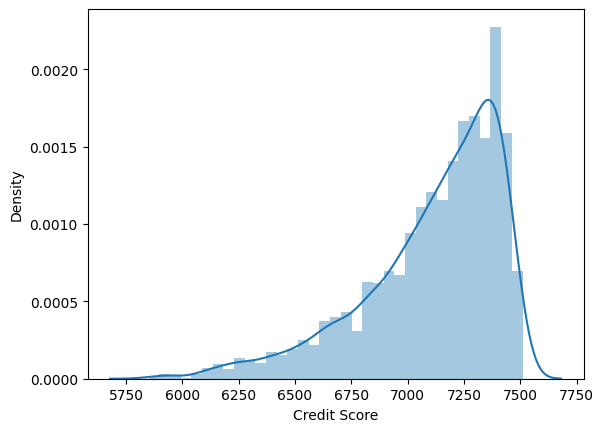

In [72]:
sns.distplot(df_train[df_train['Credit Score']>800]['Credit Score'])

Scores range from 5750 to 7750. This show that the credit score data has been multiplied by 10 for some rows. We will create a function to fix this

In [73]:
def credit_error(value):
    credit_value = value
    credit_value['Credit Score'] = np.where(value['Credit Score'] > 800, value['Credit Score'].values /10, value['Credit Score'])
    return credit_value

In [74]:
data = credit_error(df)

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,89593.0,1.305835e+07,3.329246e+07,15422.0,180334.00,314094.00,532642.0,1.000000e+08
Credit Score,70482.0,7.185656e+02,2.813334e+01,585.0,706.00,725.00,740.0,7.510000e+02
Annual Income,70482.0,1.375957e+06,1.104330e+06,76627.0,848160.00,1169773.00,1648915.0,1.655574e+08
Years in current job,89593.0,6.137544e+00,3.519618e+00,1.0,3.00,6.00,10.0,1.000000e+01
Monthly Debt,89593.0,1.841181e+04,1.214235e+04,0.0,10176.97,16149.81,23932.4,4.358433e+05
Years of Credit History,89593.0,1.824300e+01,7.034235e+00,3.6,13.50,17.00,21.7,7.050000e+01
Number of Open Accounts,89593.0,1.112574e+01,4.996396e+00,0.0,8.00,10.00,14.0,7.600000e+01
Number of Credit Problems,89593.0,1.652473e-01,4.783988e-01,0.0,0.00,0.00,0.0,1.500000e+01
Current Credit Balance,89593.0,2.940685e+05,3.720957e+05,0.0,113031.00,209855.00,367688.0,3.287897e+07
Maximum Open Credit,89593.0,7.720317e+05,8.766674e+06,0.0,277134.00,472670.00,791362.0,1.539738e+09


In [77]:
missing_values_table(df)

,Missing Values,% of Total Values
Credit Score,19111,21.331
Annual Income,19111,21.331


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

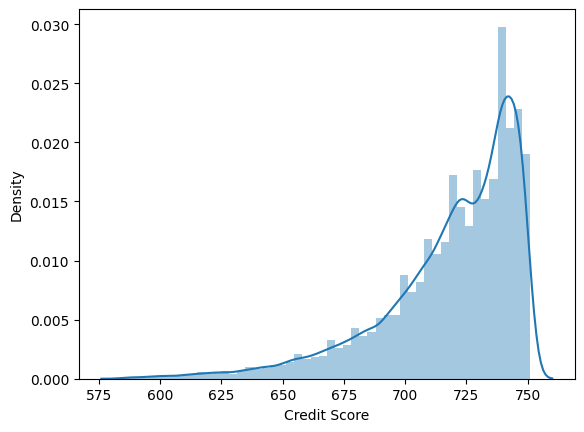

In [79]:
sns.distplot(data['Credit Score'])

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

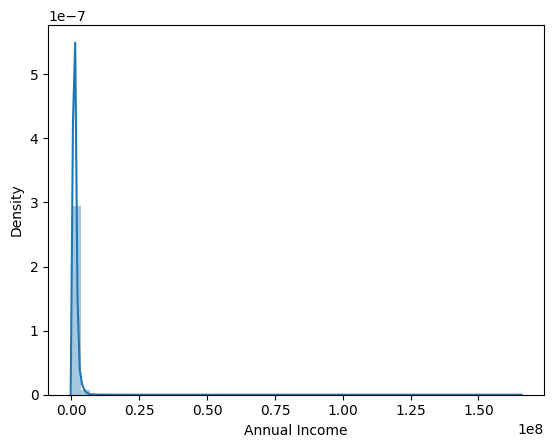

In [80]:
sns.distplot(data['Annual Income'])

Let's fill the empty rows of "Annual Income" and "Credit Score" with the median.

In [82]:
data['Credit Score'].fillna(data['Credit Score'].median(),inplace= True)

data['Annual Income'].fillna(data['Annual Income'].median(),inplace= True)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89593 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89593 non-null  object 
 1   Current Loan Amount        89593 non-null  float64
 2   Term                       89593 non-null  object 
 3   Credit Score               89593 non-null  float64
 4   Annual Income              89593 non-null  float64
 5   Years in current job       89593 non-null  float64
 6   Home Ownership             89593 non-null  object 
 7   Purpose                    89593 non-null  object 
 8   Monthly Debt               89593 non-null  float64
 9   Years of Credit History    89593 non-null  float64
 10  Number of Open Accounts    89593 non-null  float64
 11  Number of Credit Problems  89593 non-null  float64
 12  Current Credit Balance     89593 non-null  float64
 13  Maximum Open Credit        89593 non-null  flo

## Visualization of Features

Loan Status

Fully Paid     67006
Charged Off    22587
Name: Loan Status, dtype: int64


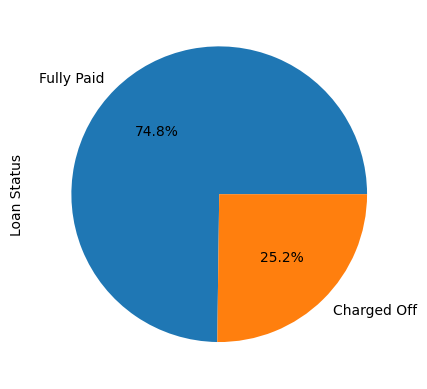

In [85]:
data['Loan Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(data['Loan Status'].value_counts())

In [19]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,110000.0,1.174621e+07,3.176716e+07,10802.0,179586.00,312026.00,5.239300e+05,1.000000e+08
Credit Score,88865.0,1.076595e+03,1.475582e+03,585.0,705.00,724.00,7.410000e+02,7.510000e+03
Annual Income,88865.0,1.377449e+06,1.063920e+06,76627.0,848844.00,1173459.00,1.651670e+06,1.655574e+08
Monthly Debt,110000.0,1.846853e+04,1.219556e+04,0.0,10211.93,16202.44,2.399752e+04,4.358433e+05
Years of Credit History,110000.0,1.820249e+01,7.015575e+00,3.6,13.50,16.90,2.170000e+01,7.050000e+01
Months since last delinquent,51553.0,3.490709e+01,2.196532e+01,0.0,16.00,32.00,5.100000e+01,1.760000e+02
Number of Open Accounts,110000.0,1.112449e+01,5.011093e+00,0.0,8.00,10.00,1.400000e+01,7.600000e+01
Number of Credit Problems,110000.0,1.680545e-01,4.843888e-01,0.0,0.00,0.00,0.000000e+00,1.500000e+01
Current Credit Balance,110000.0,2.942822e+05,3.772773e+05,0.0,112195.00,209665.00,3.674838e+05,3.287897e+07
Maximum Open Credit,109998.0,7.541012e+05,8.014002e+06,0.0,273157.50,467390.00,7.831945e+05,1.539738e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110867 entries, 0 to 10352
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           110000 non-null  float64
 4   Term                          110000 non-null  object 
 5   Credit Score                  88865 non-null   float64
 6   Annual Income                 88865 non-null   float64
 7   Years in current job          105351 non-null  object 
 8   Home Ownership                110000 non-null  object 
 9   Purpose                       110000 non-null  object 
 10  Monthly Debt                  110000 non-null  float64
 11  Years of Credit History       110000 non-null  float64
 12  Months since last delinquent  51553 non-null 

In [ ]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096655,0.012816,-0.008013,0.019465,0.010217,0.001149,-0.002417,0.003587,-0.001098,-0.001521,0.000138
Credit Score,-0.096655,1.000000,-0.020050,-0.003288,-0.010289,-0.002687,0.005273,-0.001904,-0.001618,-0.002965,-0.005709,0.005285
Annual Income,0.012816,-0.020050,1.000000,0.491288,0.163375,-0.077343,0.149064,-0.015288,0.311611,0.054308,-0.048340,0.042991
Monthly Debt,-0.008013,-0.003288,0.491288,1.000000,0.198901,-0.055090,0.411969,-0.053656,0.480003,0.040959,-0.079400,0.022500
Years of Credit History,0.019465,-0.010289,0.163375,0.198901,1.000000,-0.043284,0.131977,0.062997,0.206620,0.031841,0.066964,0.018982
Months since last delinquent,0.010217,-0.002687,-0.077343,-0.055090,-0.043284,1.000000,-0.032117,0.105371,-0.028395,-0.009110,0.126188,0.011454
Number of Open Accounts,0.001149,0.005273,0.149064,0.411969,0.131977,-0.032117,1.000000,-0.013503,0.226929,0.032834,-0.023779,0.007138
Number of Credit Problems,-0.002417,-0.001904,-0.015288,-0.053656,0.062997,0.105371,-0.013503,1.000000,-0.111639,-0.012526,0.751775,0.586958
Current Credit Balance,0.003587,-0.001618,0.311611,0.480003,0.206620,-0.028395,0.226929,-0.111639,1.000000,0.142585,-0.122359,-0.015410
Maximum Open Credit,-0.001098,-0.002965,0.054308,0.040959,0.031841,-0.009110,0.032834,-0.012526,0.142585,1.000000,-0.015043,-0.001169


<AxesSubplot:>

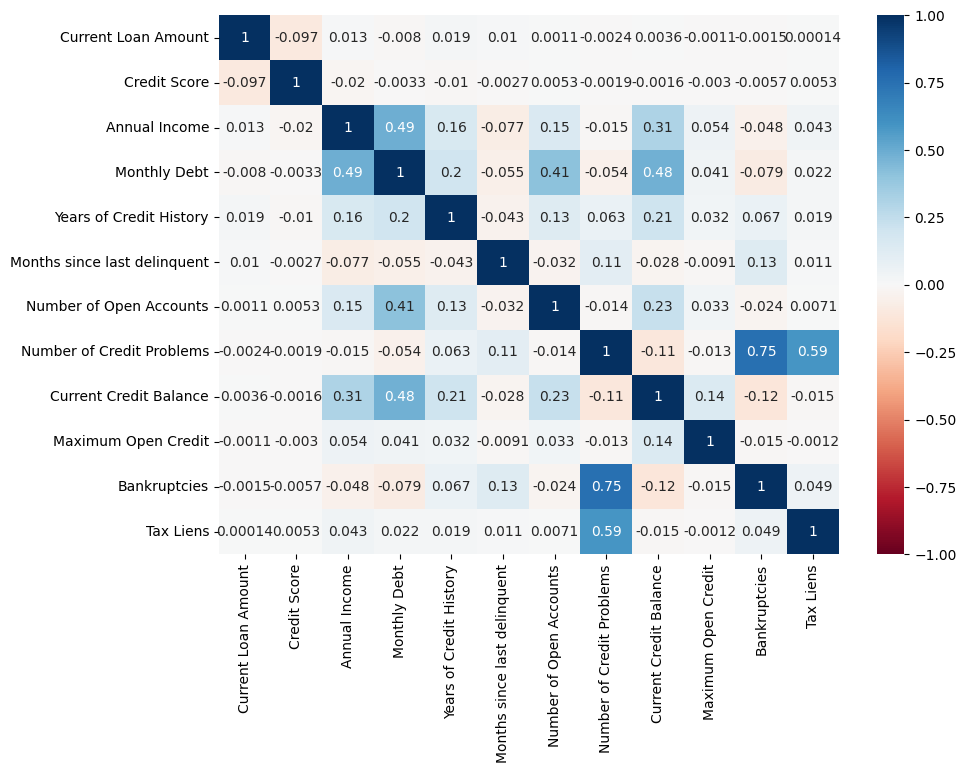

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

Bankruptcies and Number of Credit Problems have a high correlation factor, something to be addressed in the future.
Bankruptcies and Number of Credit Problems have a high correlation factor

<AxesSubplot:>

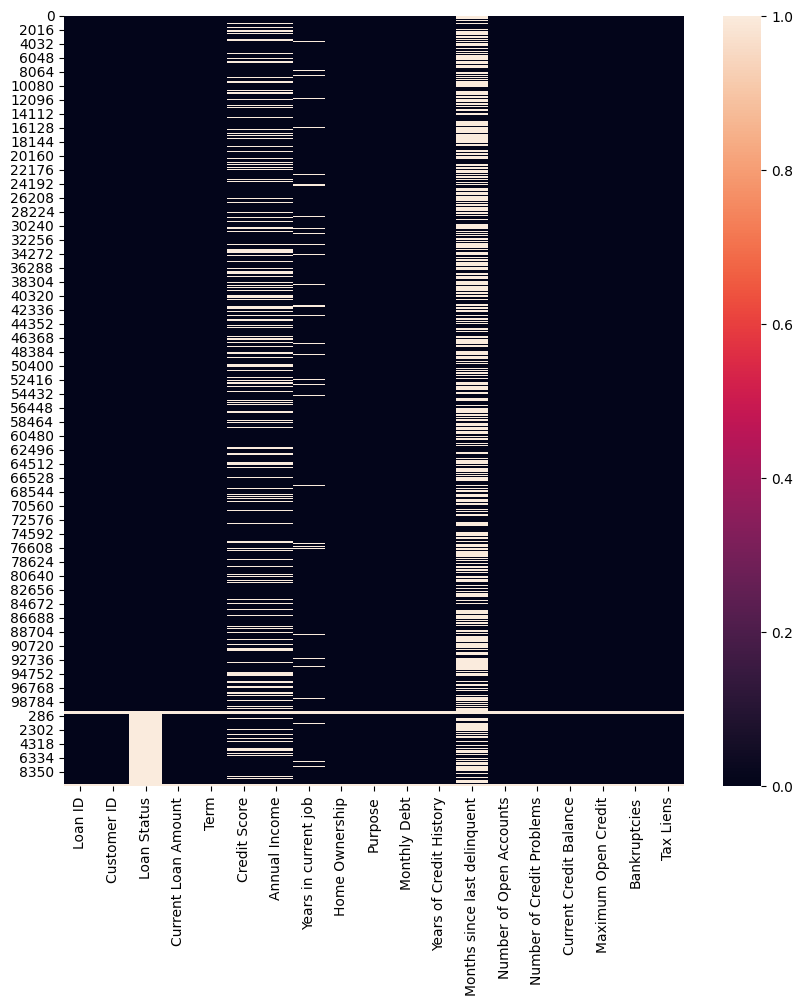

In [ ]:
# Lets plot the heatmap for null values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Months since last delinquent    59314
Credit Score                    22002
Annual Income                   22002
Loan Status                     10867
Years in current job             5516
Bankruptcies                     1093
Tax Liens                         878
Maximum Open Credit               869
Current Credit Balance            867
Number of Credit Problems         867
Number of Open Accounts           867
Loan ID                           867
Years of Credit History           867
Monthly Debt                      867
Customer ID                       867
Home Ownership                    867
Term                              867
Current Loan Amount               867
Purpose                           867
dtype: int64

In [ ]:
df.drop(['Months since last delinquent'], axis=1, inplace=True)

In [ ]:
df.tail(20)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
na= df[df['Loan ID'].isnull()].index.tolist()
len(na)

867

In [ ]:
df.drop(na, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109647 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    109647 non-null  object 
 1   Customer ID                109647 non-null  object 
 2   Loan Status                99647 non-null   object 
 3   Current Loan Amount        109647 non-null  float64
 4   Term                       109647 non-null  object 
 5   Credit Score               88587 non-null   float64
 6   Annual Income              88587 non-null   float64
 7   Years in current job       105009 non-null  object 
 8   Home Ownership             109647 non-null  object 
 9   Purpose                    109647 non-null  object 
 10  Monthly Debt               109647 non-null  float64
 11  Years of Credit History    109647 non-null  float64
 12  Number of Open Accounts    109647 non-null  float64
 13  Number of Credit Problems  1096

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Credit Score                 21060
Annual Income                21060
Loan Status                  10000
Years in current job          4638
Bankruptcies                   226
Tax Liens                       11
Maximum Open Credit              2
Years of Credit History          0
Current Credit Balance           0
Number of Credit Problems        0
Number of Open Accounts          0
Loan ID                          0
Monthly Debt                     0
Customer ID                      0
Home Ownership                   0
Term                             0
Current Loan Amount              0
Purpose                          0
dtype: int64

In [ ]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

### EDA

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

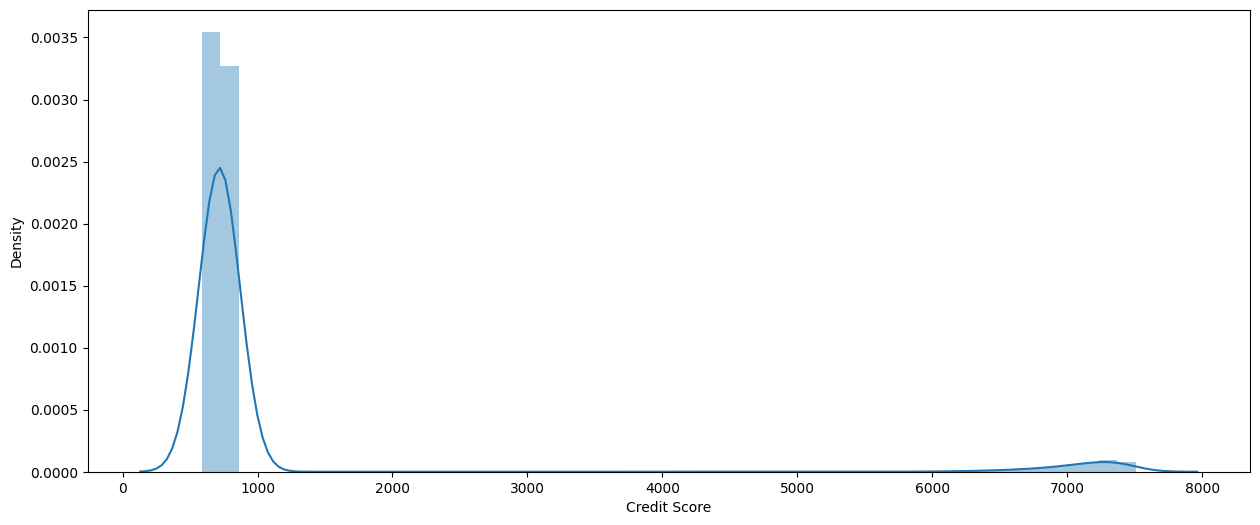

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df['Credit Score'])

Looking at the histogram for 'Credit Score', there's a possibility of a outliers, which should be addressed later

In [ ]:
print(df[df['Credit Score']>5000].shape)
print(df.shape)

(4984, 18)
(109647, 18)


In [ ]:
df[df['Credit Score']>1000].describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,4984.0,3.279577e+05,1.879894e+05,21472.0,182710.0000,292479.000,442255.000,7.888760e+05
Credit Score,4984.0,7.108658e+03,3.064276e+02,5850.0,6950.0000,7190.000,7350.000,7.510000e+03
Annual Income,4984.0,1.292998e+06,2.487061e+06,91485.0,777807.7500,1081698.500,1505674.000,1.655574e+08
Monthly Debt,4984.0,1.848617e+04,1.181719e+04,0.0,10570.2225,16354.155,23929.455,2.058014e+05
Years of Credit History,4984.0,1.782295e+01,7.040938e+00,4.1,13.0000,16.500,21.000,5.800000e+01
Number of Open Accounts,4984.0,1.126766e+01,5.112677e+00,1.0,8.0000,10.000,14.000,7.600000e+01
Number of Credit Problems,4984.0,1.681380e-01,5.050617e-01,0.0,0.0000,0.000,0.000,1.200000e+01
Current Credit Balance,4984.0,2.927405e+05,5.535099e+05,0.0,120578.7500,216267.500,369184.250,3.287897e+07
Maximum Open Credit,4983.0,6.367440e+05,1.955897e+06,0.0,267993.0000,444774.000,727925.000,9.862791e+07
Bankruptcies,4974.0,1.117813e-01,3.455644e-01,0.0,0.0000,0.000,0.000,5.000000e+00


As we can se Credit Score has been multiplied by 10 for values greater than 1000, we will standardize these values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,109647.0,1.174573e+07,3.176660e+07,10802.0,179586.00,312004.00,523930.00,1.000000e+08
Credit Score,88587.0,1.076280e+03,1.474930e+03,585.0,705.00,724.00,741.00,7.510000e+03
Annual Income,88587.0,1.377549e+06,1.064773e+06,76627.0,848844.00,1173383.00,1651670.00,1.655574e+08
Monthly Debt,109647.0,1.846864e+04,1.219871e+04,0.0,10211.74,16198.83,23997.38,4.358433e+05
Years of Credit History,109647.0,1.820615e+01,7.017245e+00,3.6,13.50,16.90,21.70,7.050000e+01
Number of Open Accounts,109647.0,1.112457e+01,5.010812e+00,0.0,8.00,10.00,14.00,7.600000e+01
Number of Credit Problems,109647.0,1.680210e-01,4.842855e-01,0.0,0.00,0.00,0.00,1.500000e+01
Current Credit Balance,109647.0,2.942906e+05,3.772757e+05,0.0,112195.00,209684.00,367545.50,3.287897e+07
Maximum Open Credit,109645.0,7.544408e+05,8.026793e+06,0.0,273240.00,467412.00,783178.00,1.539738e+09
Bankruptcies,109421.0,1.176557e-01,3.514248e-01,0.0,0.00,0.00,0.00,7.000000e+00


In [ ]:
for i,row in df.iterrows():
    if(row['Credit Score']>1000):
        k = row['Credit Score']/10
        df._set_value(i,'Credit Score',k)

In [ ]:
df['Credit Score'].describe().T

count    88773.000000
mean       716.275545
std         28.316605
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

All the Credit Scores have been fixed, now lets check the Distance plot again

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

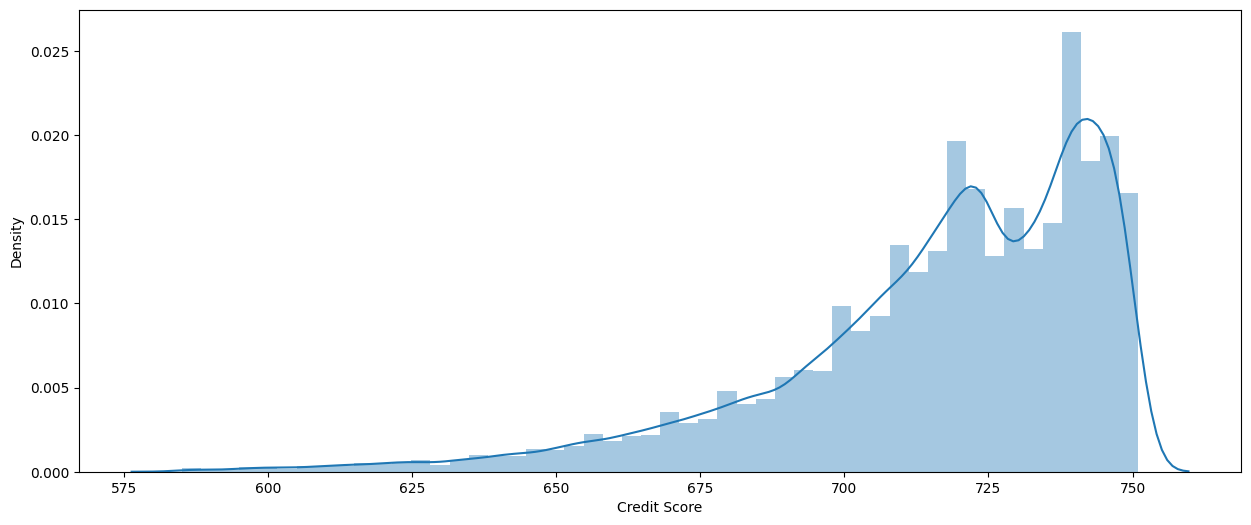

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df['Credit Score'])

We observe the data is negatively skewed, which is logical since Credit Scores are generally range between 600-800

In [ ]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


Lets check Current Loan Amount

In [ ]:
df['Current Loan Amount'].describe()

count    1.096470e+05
mean     1.174573e+07
std      3.176660e+07
min      1.080200e+04
25%      1.795860e+05
50%      3.120040e+05
75%      5.239300e+05
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Density'>

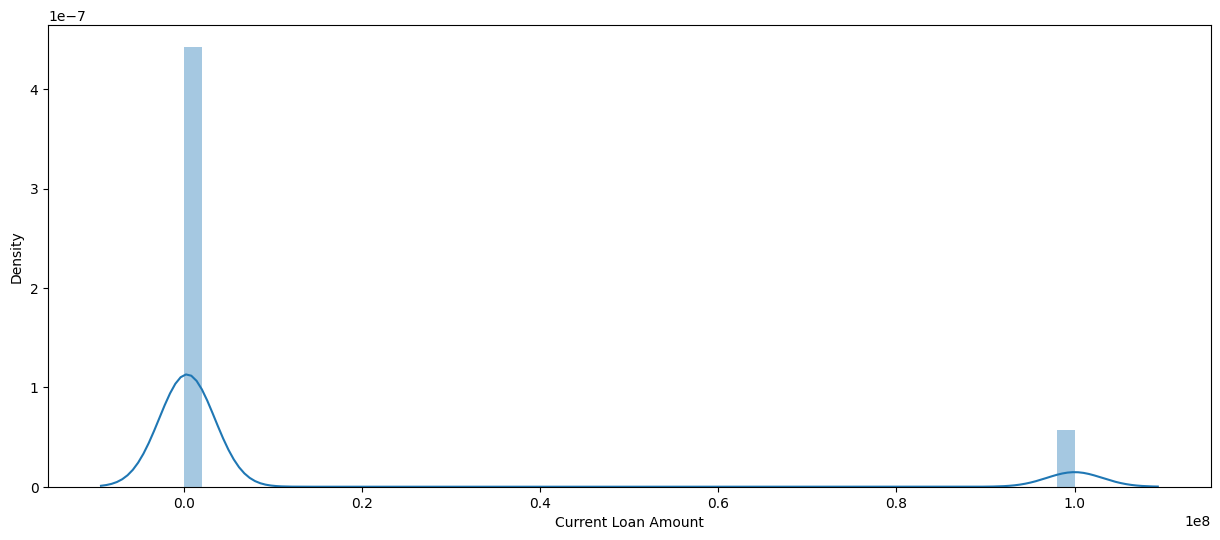

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df['Current Loan Amount'])

Since, there are too many extreme values in the dataset, We will drop the extreme values

<AxesSubplot:xlabel='Current Loan Amount', ylabel='Density'>

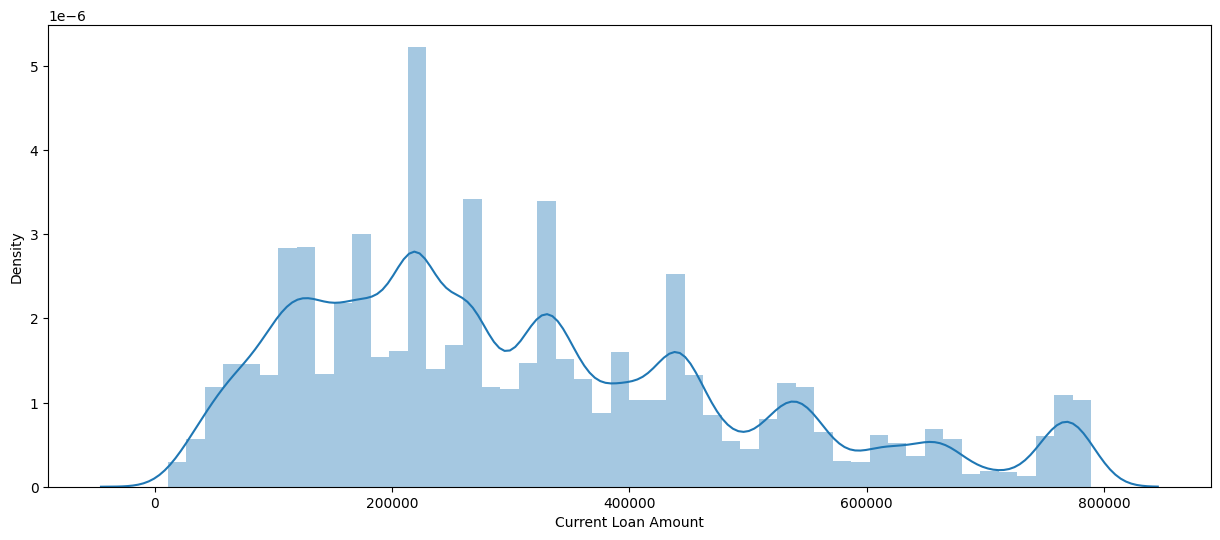

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Current Loan Amount']<1000000]['Current Loan Amount'])

In [ ]:
df = df[df['Current Loan Amount']<1000000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97071 entries, 0 to 9997
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    97071 non-null  object 
 1   Customer ID                97071 non-null  object 
 2   Loan Status                88204 non-null  object 
 3   Current Loan Amount        97071 non-null  float64
 4   Term                       97071 non-null  object 
 5   Credit Score               76197 non-null  float64
 6   Annual Income              76011 non-null  float64
 7   Years in current job       92907 non-null  object 
 8   Home Ownership             97071 non-null  object 
 9   Purpose                    97071 non-null  object 
 10  Monthly Debt               97071 non-null  float64
 11  Years of Credit History    97071 non-null  float64
 12  Number of Open Accounts    97071 non-null  float64
 13  Number of Credit Problems  97071 non-null  floa

Let us explore the 'Term' feature

In [ ]:
df.groupby(['Term'])['Term'].value_counts()

Term        Term      
Long Term   Long Term     27872
Short Term  Short Term    69199
Name: Term, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97071 entries, 0 to 9997
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    97071 non-null  object 
 1   Customer ID                97071 non-null  object 
 2   Loan Status                88204 non-null  object 
 3   Current Loan Amount        97071 non-null  float64
 4   Term                       97071 non-null  object 
 5   Credit Score               76197 non-null  float64
 6   Annual Income              76011 non-null  float64
 7   Years in current job       92907 non-null  object 
 8   Home Ownership             97071 non-null  object 
 9   Purpose                    97071 non-null  object 
 10  Monthly Debt               97071 non-null  float64
 11  Years of Credit History    97071 non-null  float64
 12  Number of Open Accounts    97071 non-null  float64
 13  Number of Credit Problems  97071 non-null  floa

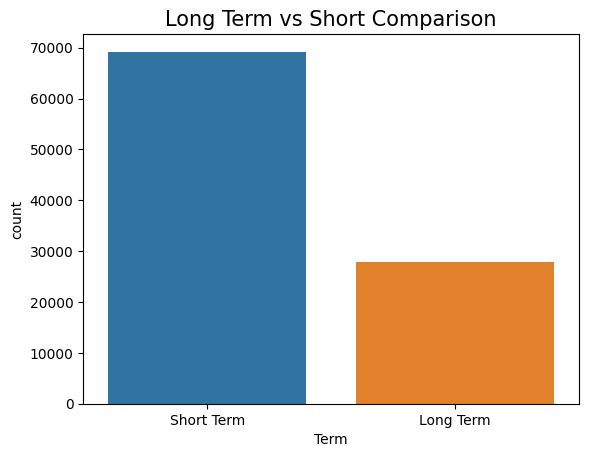

In [ ]:
p=sns.countplot(x=df['Term'])
p.axes.set_title("Long Term vs Short Comparison",fontsize=15)
plt.show()

Let us explore Annual Income

In [ ]:
df['Annual Income'].describe()

count    7.601100e+04
mean     1.372705e+06
std      1.086380e+06
min      7.662700e+04
25%      8.467160e+05
50%      1.167569e+06
75%      1.645096e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

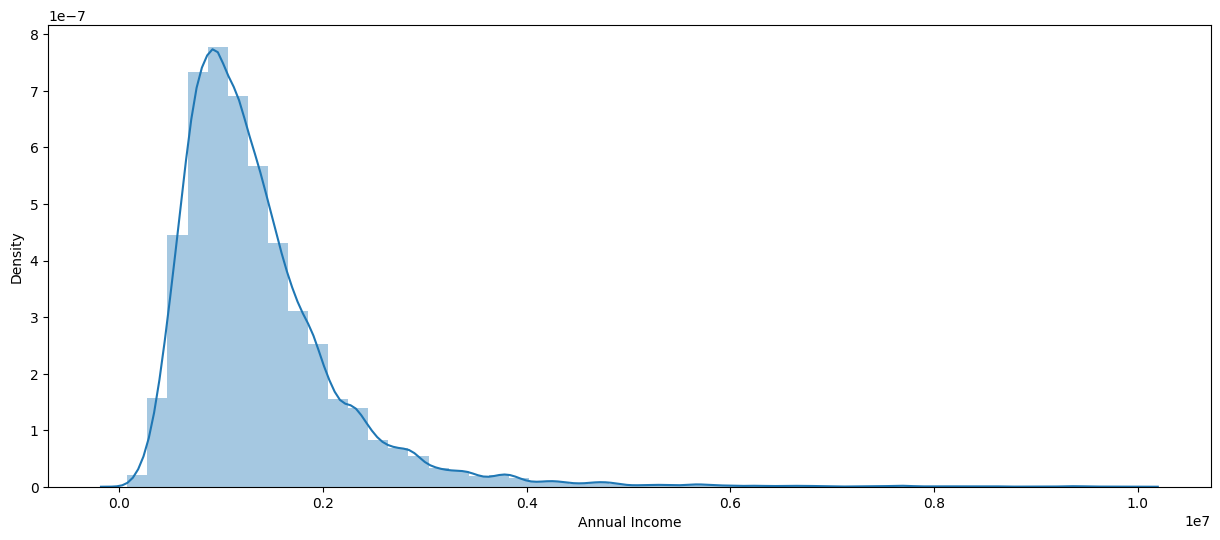

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Annual Income']<10000000]['Annual Income'])

In [ ]:
df[df['Annual Income']<10000000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,729.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,4d0d0e65-e9aa-43e4-8de0-8aa2869a9983,add5361a-e612-4c58-bd7d-414543250ebc,NaN,428604.0,Long Term,697.0,2183043.0,6 years,Home Mortgage,Debt Consolidation,16882.07,22.1,10.0,0.0,385187.0,525316.0,0.0,0.0
9993,6f0b1e02-d222-4227-9161-b0c4fff4dd76,879d5bf4-6597-4f2b-ae7c-9deb68537c88,NaN,220858.0,Short Term,737.0,1234088.0,< 1 year,Rent,Debt Consolidation,20362.49,9.5,10.0,0.0,273353.0,409442.0,0.0,0.0
9994,a2701102-3cb0-46a6-8658-e6f20d950182,6dc5fa63-93f4-43a9-8192-2df57548287b,NaN,442596.0,Short Term,739.0,1528968.0,7 years,Home Mortgage,Debt Consolidation,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,8ee2002b-8fb6-4af0-ab74-25a1c23e7647,NaN,157806.0,Short Term,731.0,1514376.0,6 years,Rent,Debt Consolidation,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Annual Income                21060
Credit Score                 20874
Loan Status                   8867
Years in current job          4164
Bankruptcies                   195
Tax Liens                       10
Maximum Open Credit              2
Years of Credit History          0
Current Credit Balance           0
Number of Credit Problems        0
Number of Open Accounts          0
Loan ID                          0
Monthly Debt                     0
Customer ID                      0
Home Ownership                   0
Term                             0
Current Loan Amount              0
Purpose                          0
dtype: int64